In [4]:
import os
import mne
from scipy.fft import fft, ifft, fftfreq

### Интерполяция и семплирование

In [ ]:
path = rf'.\datasets\tuab\tuh_eeg_abnormal\v3.0.1\edf\train\normal\01_tcp_ar'
file_path = path + '\\' + os.listdir(path)[3]

data = mne.io.read_raw_edf(file_path, verbose=False).get_data()[0]
data = data[:1000]
data.shape

(1000,)

#### 1. Полиномы Лагранжа

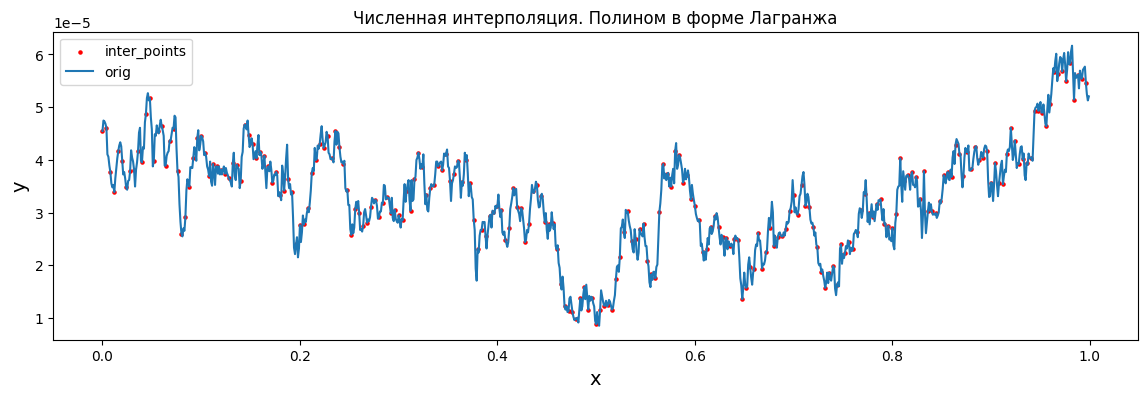

In [ ]:
# оригинальный сигнал
x_plot = list(map(lambda x: x / 1000, range(data.shape[0])))
y_plot = list(data)

# шаг узлов интерполяции
h = 0.5

# узлы интерполяции
x1_plot = [x_plot[i] for i in range(0, len(x_plot), 4)]
y1_plot = [y_plot[i] for i in range(0, len(y_plot), 4)]

# задание графика
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")
ax.scatter(x1_plot, y1_plot, c='r', s=5, label='inter_points')
ax.plot(x_plot, y_plot, label='orig')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

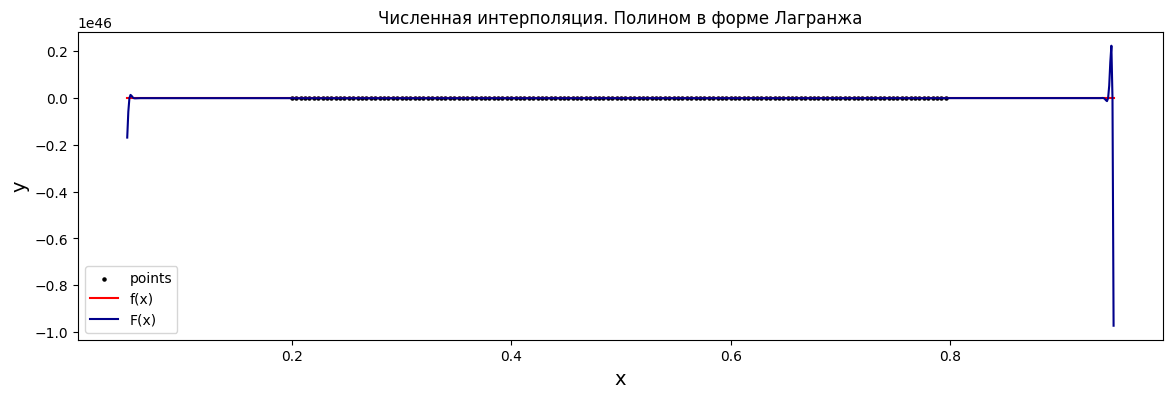

In [ ]:
# интерполянта
def F1(x, x_plot, y_plot):
    sum = 0
    
    for i in range(len(x_plot)):
        mult = 1
        for j in range(len(x_plot)):
            if i != j:
                mult *= (x - x_plot[j]) / (x_plot[i] - x_plot[j])
        sum += y_plot[i] * mult
    
    return sum

# интерполянта (точки для построения гладкого графика)
X0_plot = x_plot
Y0_plot = [F1(x, x1_plot, y1_plot) for x in X0_plot]


# общий график
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")

a = 50

ax.scatter(x1_plot[a:-a], y1_plot[a:-a], c='black', s=5, label='points')
ax.plot(x_plot[a:-a], y_plot[a:-a], color="red", label='f(x)')
ax.plot(X0_plot[a:-a], Y0_plot[a:-a], color="darkblue", label='F(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [ ]:
# # Значение интерполянты в заданных по условию точках
# # задание исследуемых точек
# X1_plot = []

# for i in range(0, len(x1_plot) - 1):
#     X1_plot.append(x1_plot[i])
#     x_ = (x1_plot[i] + x1_plot[i + 1]) / 2
#     X1_plot.append(x_)

# X1_plot.append(b)

# Y1_plot = [F1(x, x1_plot, y1_plot) for x in X1_plot]



# d = {'x*': [], 'F(x*)': []}

# for x, y in zip(X1_plot, Y1_plot):
#     d['x*'].append(x)
#     d['F(x*)'].append(y)

# #     print("(x* = {0:.4f}, F(x*) = {1:.4f})".format(x, y))

# print("Step: ", h)

# df = pd.DataFrame(data=d)
# df

#### 2. Линейные отрезки

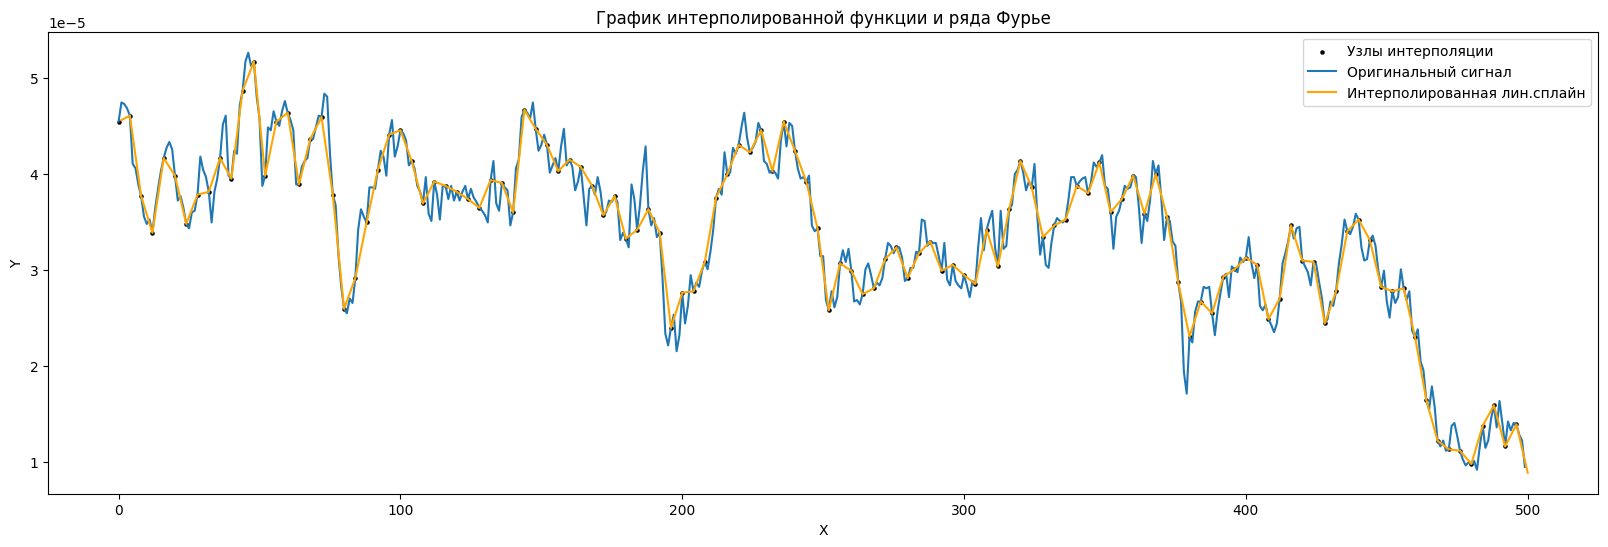

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


# Табличные данные
# x_plot = list(map(lambda x: x / 1000, range(data.shape[0])))
x_plot = list(range(data.shape[0]))
y_plot = list(data)

# узлы интерполяции
X = [x_plot[i] for i in range(0, len(x_plot), 4)]
Y = [y_plot[i] for i in range(0, len(y_plot), 4)]

# Строим сплайновую интерполяцию
from scipy.interpolate import CubicSpline, interp1d
linear = interp1d(X, Y)

# Создаем данные для построения графика
x_values = np.array(range(data.shape[0]))[1:-4]
y_lin = linear(x_values)

l = 500

lim = max(x_values[:l])
index = np.where(X < lim)[0]
X = np.array(X)[index]
Y = np.array(Y)[index]

# Построение графика
plt.figure(figsize=(20, 6))
plt.scatter(X, Y, color='black', label='Узлы интерполяции', s=5)
plt.plot(x_plot[:l], y_plot[:l], label='Оригинальный сигнал')
plt.plot(x_values[:l], y_lin[:l], 'orange', label='Интерполированная лин.сплайн')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График интерполированной функции и ряда Фурье')
# plt.grid(True)
plt.show()

#### 3. Кубические сплайны

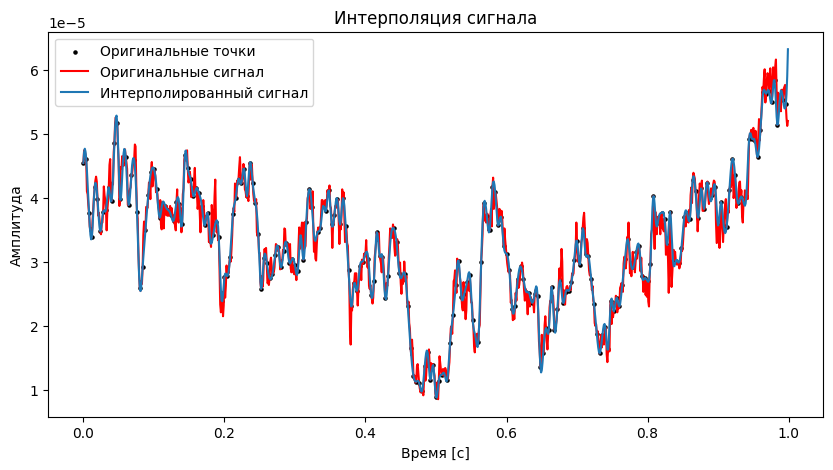

In [ ]:
from scipy.interpolate import interp1d

# Интерполируем оригинальный сигнал
interp_func = interp1d(x1_plot, y1_plot, kind='cubic', fill_value="extrapolate")  # Кубическая интерполяция с экстраполяцией
new_y = interp_func(x_plot)

# Визуализируем интерполированный сигнал
plt.figure(figsize=(10, 5))
plt.scatter(x1_plot, y1_plot, color='black', label='Оригинальные точки', s=5)
plt.plot(x_plot, y_plot, color='red', label='Оригинальные сигнал')
plt.plot(x_plot, new_y, label='Интерполированный сигнал')
plt.title('Интерполяция сигнала')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

#### 4. Прямое и обратное преобразование Фурье

In [ ]:
# N = len(x1_plot)
# interp = 4
# restored = ifft(N*fft(y1_plot), interp*N) / 100

In [ ]:
# # общий график
# fig, ax = plt.subplots(figsize=(14, 4))
# ax.set_title("Преобразование Фурье")

# ax.plot(x_plot, y_plot, color="red", label='orig')
# ax.scatter(x1_plot, y1_plot, c='black', s=5, label='points')
# ax.plot(x_plot, restored, color="darkblue", label='restored')

# ax.set_xlabel("x", fontsize=14)        
# ax.set_ylabel("y", fontsize=14)

# ax.legend()

# plt.show()

#### 5. Разложиние в ряд Фурье

C:\Users\kshch\AppData\Local\Temp\ipykernel_44536\116957238.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a0 = (1 / L) * quad(cspline, 0, L)[0]
C:\Users\kshch\AppData\Local\Temp\ipykernel_44536\116957238.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling th

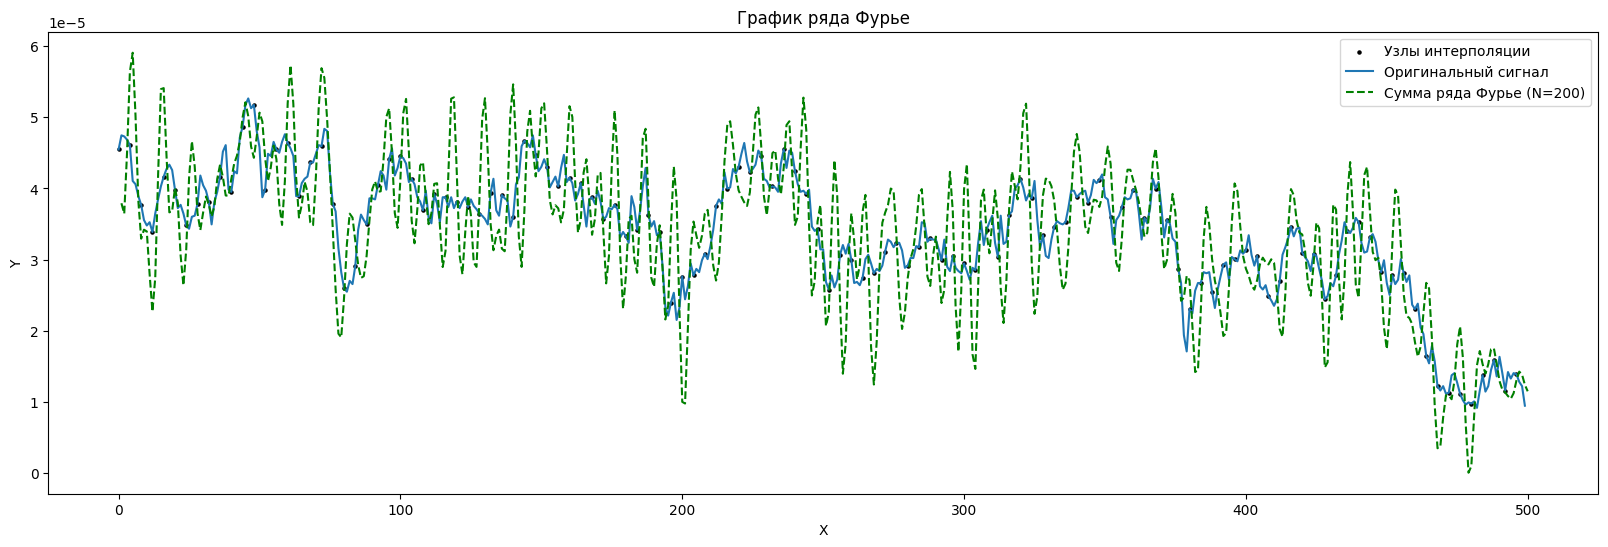

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Табличные данные
# x_plot = list(map(lambda x: x / 1000, range(data.shape[0])))
x_plot = list(range(data.shape[0]))
y_plot = list(data)

# узлы интерполяции
X = [x_plot[i] for i in range(0, len(x_plot), 4)]
Y = [y_plot[i] for i in range(0, len(y_plot), 4)]

# Строим интерполяцию
from scipy.interpolate import CubicSpline
cspline = CubicSpline(X, Y)

# Разложение в ряд Фурье
L = X[-1] - X[0]
N = 200
k = np.arange(1, N + 1)

def integrate_cos(x, k):
    return np.cos(2 * np.pi * x * k / L) * cspline(x)

def integrate_sin(x, k):
    return np.sin(2 * np.pi * x * k / L) * cspline(x)

a0 = (1 / L) * quad(cspline, 0, L)[0]
ak = (2 / L) * np.array([quad(integrate_cos, 0, L, args=(ki,))[0] for ki in k])
bk = (2 / L) * np.array([quad(integrate_sin, 0, L, args=(ki,))[0] for ki in k])

# Сумма ряда Фурье
def fourier_series(x):
    series = a0 + np.sum(ak.reshape(-1, 1) * np.cos(2 * np.pi * x * k.reshape(-1, 1) / L) + bk.reshape(-1, 1) * np.sin(2 * np.pi * x * k.reshape(-1, 1) / L), axis=0)
    return series.flatten()

x_values = np.array(range(data.shape[0]))[1:-4]
y_fourier = fourier_series(x_values)



# Построение графика
l = 500
lim = max(x_values[:l])
index = np.where(X < lim)[0]
X = np.array(X)[index]
Y = np.array(Y)[index]

plt.figure(figsize=(20, 6))
plt.scatter(X, Y, color='black', label='Узлы интерполяции', s=5)
plt.plot(x_plot[:l], y_plot[:l], label='Оригинальный сигнал')
plt.plot(x_values[:l], y_fourier[:l], 'g--', label=f'Сумма ряда Фурье (N={N})')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График ряда Фурье')
# plt.grid(True)
plt.show()


![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)

#### Общее

C:\Users\kshch\AppData\Local\Temp\ipykernel_44536\2236258873.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a0 = (1 / L) * quad(cspline, 0, L)[0]
C:\Users\kshch\AppData\Local\Temp\ipykernel_44536\2236258873.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling 

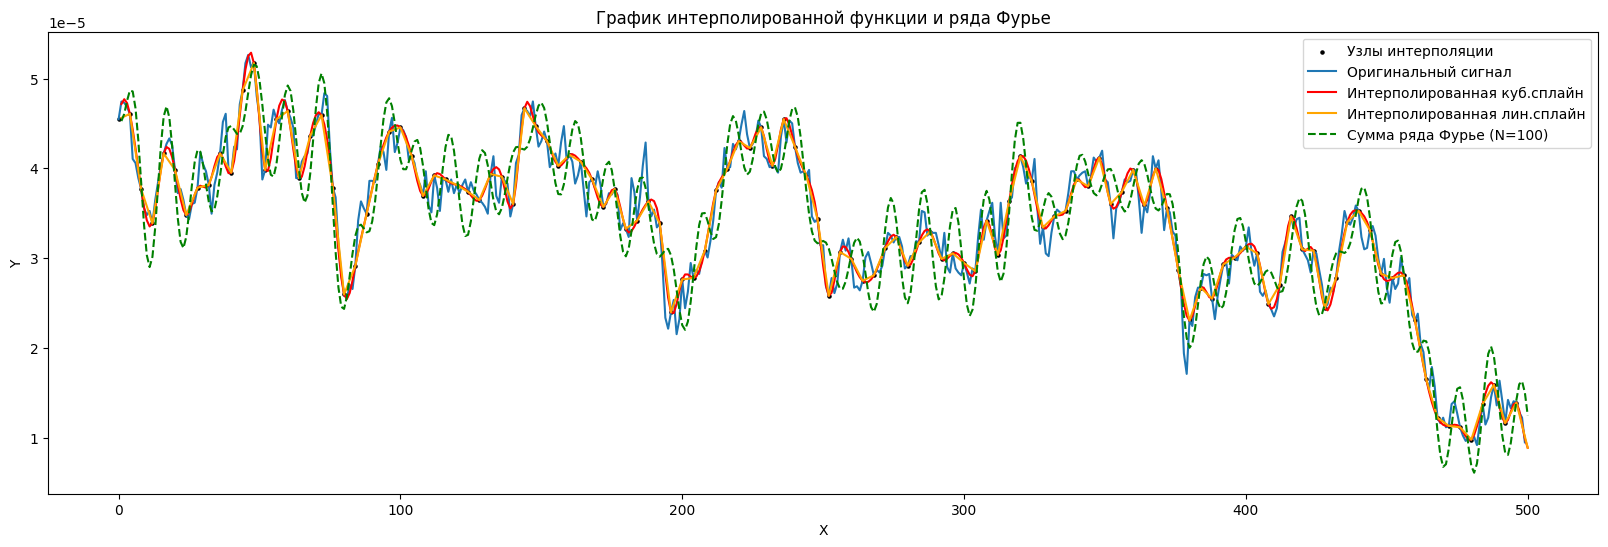

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


# Табличные данные
# x_plot = list(map(lambda x: x / 1000, range(data.shape[0])))
x_plot = list(range(data.shape[0]))
y_plot = list(data)

# узлы интерполяции
X = [x_plot[i] for i in range(0, len(x_plot), 4)]
Y = [y_plot[i] for i in range(0, len(y_plot), 4)]

# Строим сплайновую интерполяцию
from scipy.interpolate import CubicSpline, interp1d
cspline = CubicSpline(X, Y)
linear = interp1d(X, Y)

# Разложение в ряд Фурье
L = X[-1] - X[0]
N = 100
k = np.arange(1, N + 1)

def integrate_cos(x, k):
    return np.cos(2 * np.pi * x * k / L) * cspline(x)

def integrate_sin(x, k):
    return np.sin(2 * np.pi * x * k / L) * cspline(x)

a0 = (1 / L) * quad(cspline, 0, L)[0]
ak = (2 / L) * np.array([quad(integrate_cos, 0, L, args=(ki,))[0] for ki in k])
bk = (2 / L) * np.array([quad(integrate_sin, 0, L, args=(ki,))[0] for ki in k])

# Сумма ряда Фурье
def fourier_series(x):
    series = a0 + np.sum(ak.reshape(-1, 1) * np.cos(2 * np.pi * x * k.reshape(-1, 1) / L) + bk.reshape(-1, 1) * np.sin(2 * np.pi * x * k.reshape(-1, 1) / L), axis=0)
    return series.flatten()

# Создаем данные для построения графика
x_values = np.array(range(data.shape[0]))[1:-4]
y_spline = cspline(x_values)
y_lin = linear(x_values)
y_fourier = fourier_series(x_values)

l = 500

lim = max(x_values[:l])
index = np.where(X < lim)[0]
X = np.array(X)[index]
Y = np.array(Y)[index]

# Построение графика
plt.figure(figsize=(20, 6))
plt.scatter(X, Y, color='black', label='Узлы интерполяции', s=5)
plt.plot(x_plot[:l], y_plot[:l], label='Оригинальный сигнал')
plt.plot(x_values[:l], y_spline[:l], 'r', label='Интерполированная куб.сплайн')
plt.plot(x_values[:l], y_lin[:l], 'orange', label='Интерполированная лин.сплайн')
plt.plot(x_values[:l], y_fourier[:l], 'g--', label=f'Сумма ряда Фурье (N={N})')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График интерполированной функции и ряда Фурье')
# plt.grid(True)
plt.show()

Сравнить интерполяцию на множестве сигналов

In [ ]:
y_plot = np.array(y_plot)
y_spline = np.array(y_spline)
y_lin = np.array(y_lin)
y_fourier = np.array(y_fourier)

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


# метрики качества прогноза
def metrics_report(y_true, y_pred):
    y_true_mean = y_true.mean() * np.ones(shape=(len(y_true),))

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    mae_zero = mean_absolute_error(y_true_mean, y_pred)
    
    resport = pd.DataFrame([mse, r2, mae, mae_zero],
                            index=['mse', 'r2', 'mae', 'mae_zero'])

    return resport

In [ ]:
metrics_report(y_plot[1:-4], y_fourier)

,0
mse,1.316629e-11
r2,8.681218e-01
mae,3.072983e-06
mae_zero,8.058964e-06


In [ ]:
metrics_report(y_plot[1:-4], y_spline)

,0
mse,3.511686e-12
r2,9.648257e-01
mae,1.254844e-06
mae_zero,7.802076e-06


In [ ]:
metrics_report(y_plot[1:-4], y_lin)

,0
mse,3.349322e-12
r2,9.664520e-01
mae,1.232434e-06
mae_zero,7.727789e-06


#### Оценка на множестве сигналов

In [ ]:
data = []
for files_path in files_paths[:50]:
    data_i = mne.io.read_raw_edf(files_path, verbose=False).get_data().tolist()
    data.extend(data_i)

In [ ]:
data = np.array(data)
data.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1674,) + inhomogeneous part.

In [ ]:
n = len(Y)
mse_fourie = sum((Y[i] - y_fourier[i])**2 for i in range(n)) / (n-2)
mse_interp = sum((Y[i] - y_interp[i])**2 for i in range(n)) / (n-2)

print("Fourie:", mse_fourie)
print("Interp:", mse_interp)

Fourie: 1.7768603095475888e-10
Interp: 1.4883173961757255e-10


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Создадим пример временного ряда
# t = np.linspace(0, 1, 400, endpoint=False)  # Временная ось
# y = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Сигнал с двумя частотами

# # Применяем ДПФ
# Y = np.fft.fft(y)

# # Частоты
# frequencies = np.fft.fftfreq(len(y), d=t[1] - t[0])

# # Визуализируем оригинальный сигнал и его спектр
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(t, y)
# plt.title('Оригинальный сигнал')
# plt.xlabel('Время [с]')
# plt.ylabel('Амплитуда')

# plt.subplot(1, 2, 2)
# plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])  # Только положительные частоты
# plt.title('Спектр сигнала')
# plt.xlabel('Частота [Гц]')
# plt.ylabel('Амплитуда')

# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d

# # Создадим пример временного ряда
# t = np.linspace(0, 1, 400, endpoint=False)  # Временная ось
# y = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Сигнал с двумя частотами

# # Определим новые временные точки для семплирования
# new_t = np.linspace(0, 1, 1000)  # Более плотная сетка

# # Интерполируем оригинальный сигнал
# interp_func = interp1d(t, y, kind='cubic', fill_value="extrapolate")  # Кубическая интерполяция с экстраполяцией
# new_y = interp_func(new_t)

# # Визуализируем интерполированный сигнал
# plt.figure(figsize=(10, 5))
# plt.plot(new_t, new_y, label='Интерполированный сигнал')
# plt.scatter(t, y, color='red', label='Оригинальные точки', zorder=5)
# plt.title('Интерполяция сигнала')
# plt.xlabel('Время [с]')
# plt.ylabel('Амплитуда')
# plt.legend()
# plt.show()

In [ ]:
# # Генерируем новые точки на основе спектра
# new_freqs = np.linspace(0, 10, 1000)  # Новые частоты для семплирования
# new_signal = np.zeros_like(new_freqs)

# # Интерполяция спектра для новых частот
# spectrum_interpolated = np.interp(new_freqs, frequencies[:len(spectrum)//2], np.abs(spectrum[:len(spectrum)//2]))

# # Генерируем новый сигнал
# for i, freq in enumerate(new_freqs):
#     new_signal += spectrum_interpolated[i] * np.sin(2 * np.pi * freq * t)

# # Визуализируем новый сигнал
# plt.figure(figsize=(12, 6))
# plt.plot(t, new_signal)
# plt.title('Сгенерированный сигнал на основе спектра')
# plt.xlabel('Время')
# plt.ylabel('Амплитуда')
# plt.show()

In [ ]:
spectrum_interpolated[i]

9.114416338042528

In [ ]:
len(np.sin(2 * np.pi * freq * t))

500

In [ ]:
# все данные
df_prophet = df.rename(columns={'index': 'ds', 'time_points': 'y'})

# # тренеровочная и тестовая выборки
# data_train = df_prophet.iloc[:-num_steps]
# data_test = df_prophet.iloc[-num_steps:]
# data_train.head()

In [ ]:
df_prophet

,ds,y
0,0,4.547466e-05
1,1,4.745830e-05
2,2,4.730571e-05
3,3,4.684795e-05
4,4,4.608501e-05
...,...,...
338995,338995,3.500000e-09
338996,338996,3.500000e-09
338997,338997,3.500000e-09
338998,338998,3.500000e-09


In [ ]:
df_prophet = df.reset_index().rename(columns={'date': 'ds'})
# тренеровочная и тестовая выборки
data_train = df_prophet.iloc[:1000]
data_test = df_prophet.iloc[1000:1100]
data_train.head()

,ds,y
0,0.000,0.000045
1,0.004,0.000047
2,0.008,0.000047
3,0.012,0.000047
4,0.016,0.000046


In [ ]:
from prophet import Prophet

# модель
model = Prophet()
model.fit(data_train)
future = model.make_future_dataframe(periods=1)

02:02:00 - cmdstanpy - INFO - Chain [1] start processing
02:02:00 - cmdstanpy - INFO - Chain [1] done processing
02:02:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:02:00 - cmdstanpy - INFO - Chain [1] start processing
02:02:02 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast = model.predict(df_prophet)
test_forecast = forecast.iloc[1000:1100]
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1000,1970-01-01 00:00:00.000000004,0.000052,0.000042,0.000062,0.000052,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.000052
1001,1970-01-01 00:00:00.000000004,0.000052,0.000043,0.000062,0.000052,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.000052
1002,1970-01-01 00:00:00.000000004,0.000052,0.000041,0.000063,0.000052,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.000052
1003,1970-01-01 00:00:00.000000004,0.000052,0.000042,0.000063,0.000052,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.000052
1004,1970-01-01 00:00:00.000000004,0.000052,0.000042,0.000063,0.000052,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.000052


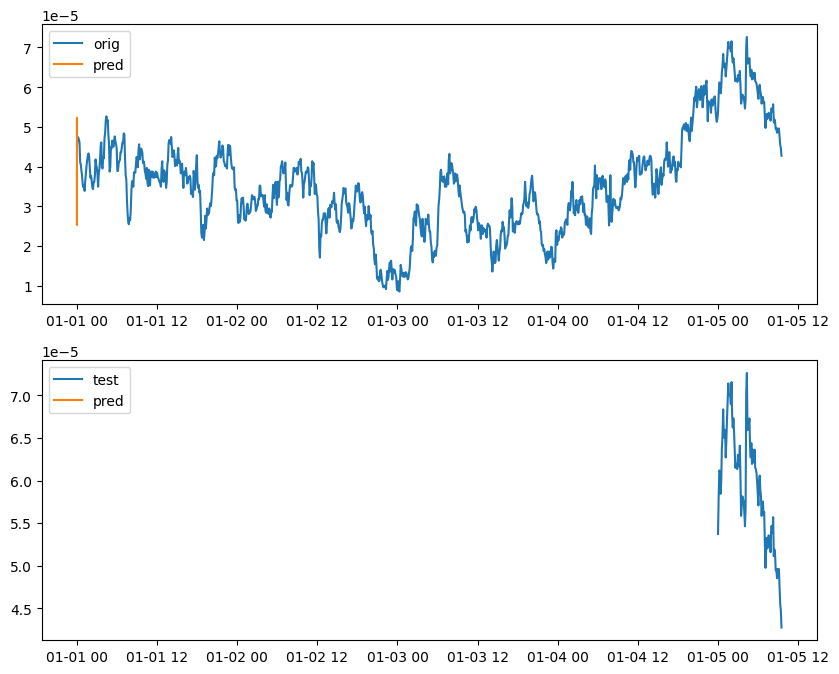

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(df_prophet.set_index('ds').y, label='orig')
plt.plot(forecast.set_index('ds').yhat, label='pred')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data_test.set_index('ds').y, label='test')
plt.plot(test_forecast.set_index('ds').yhat, label='pred')

plt.legend()

In [ ]:
data = mne.io.read_raw_edf(files_paths[0], verbose=False).get_data()[0]
data = data[:1100]
df = pd.DataFrame({'y': data})
df['date'] = df.index / 250
df = df.set_index("date")

In [ ]:
df

,y
date,
0.000,0.000045
0.004,0.000047
0.008,0.000047
0.012,0.000047
0.016,0.000046
...,...
4.380,0.000050
4.384,0.000047
4.388,0.000045


In [ ]:
data = df.iloc[:1100]
train = df.iloc[:1000]
test = df.iloc[1000:100]

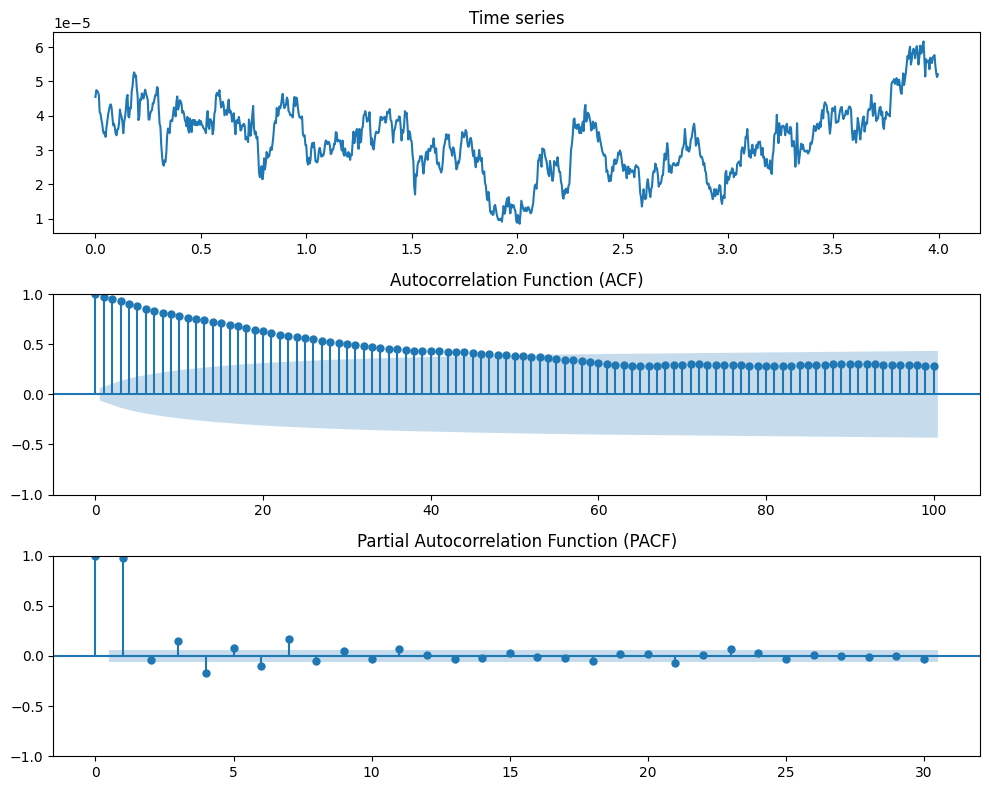

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

def plot_acf_pacf(series, acf_lags=100, pacf_lags=30):
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))

    axes[0].plot(series.index, series['y'])
    axes[0].set_title(f'Time series')

    plot_acf(series['y'], lags=acf_lags, ax=axes[1])
    axes[1].set_title('Autocorrelation Function (ACF)')

    plot_pacf(series['y'], lags=pacf_lags, ax=axes[2])
    axes[2].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()


plot_acf_pacf(train, acf_lags=100, pacf_lags=30)

In [ ]:
# обучение модели STL
stl = STL(train, period=14)
result = stl.fit()

<Axes: xlabel='date'>

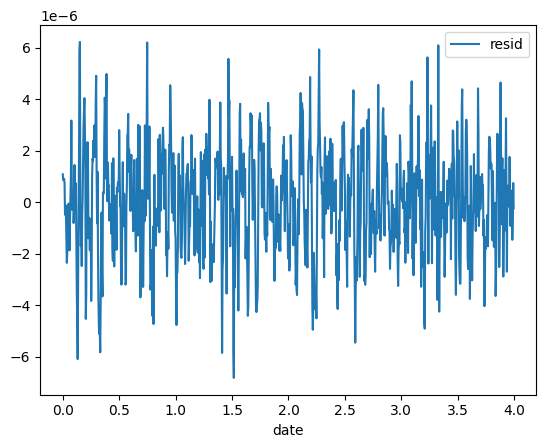

In [ ]:
result.resid.to_frame().plot()

In [ ]:
from sktime.forecasting.arima import AutoARIMA

# обучение модели
model = AutoARIMA(sp=7, seasonal=True, max_p=2, max_q=2, stationary=True)
model.fit(train.reset_index())

y_pred = model.predict(data.reset_index().index)
model.get_fitted_params()

c:\Users\kshch\Projects\Наука\Разработка\dataset\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kshch\Projects\Наука\Разработка\dataset\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\kshch\Projects\Наука\Разработка\dataset\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kshch\Projects\Наука\Разработка\dataset\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

{'forecasters':                                                           date  \
 forecasters  AutoARIMA(max_p=2, max_q=2, sp=7, stationary=T...   
 
                                                              y  
 forecasters  AutoARIMA(max_p=2, max_q=2, sp=7, stationary=T...  ,
 "forecasters.loc['forecasters','date']": AutoARIMA(max_p=2, max_q=2, sp=7, stationary=True),
 "forecasters.loc['forecasters','date']__intercept": 0.0002057902245965561,
 "forecasters.loc['forecasters','date']__ar.L1": 0.09609283691360715,
 "forecasters.loc['forecasters','date']__ar.L2": 0.8923961946361411,
 "forecasters.loc['forecasters','date']__ma.L1": 1.5818899336095136,
 "forecasters.loc['forecasters','date']__ma.L2": 0.8532324528778293,
 "forecasters.loc['forecasters','date']__ar.S.L7": 0.10534062336358674,
 "forecasters.loc['forecasters','date']__ar.S.L14": 0.8810948891317928,
 "forecasters.loc['forecasters','date']__ma.S.L7": 1.5767983067062366,
 "forecasters.loc['forecasters','date']__ma.S.L14": 0.

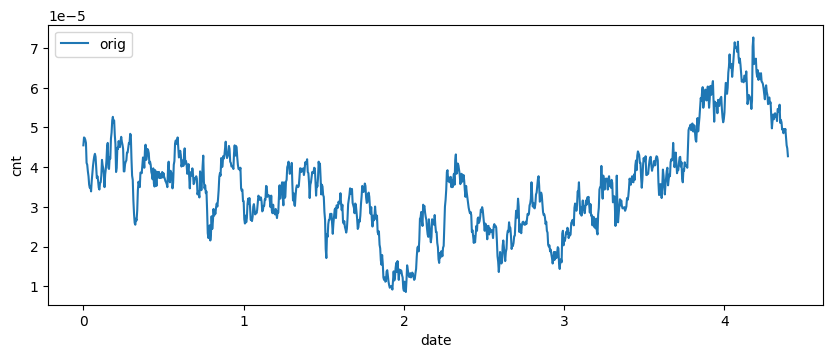

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(data["y"], label='orig')
# plt.plot(y_pred["y"], label='pred')
plt.xlabel('date')
plt.ylabel('cnt');

plt.legend()

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sktime.transformations.series.boxcox import BoxCoxTransformer
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

In [ ]:
data

0       0.000045
1       0.000047
2       0.000047
3       0.000047
4       0.000046
          ...   
1095    0.000050
1096    0.000047
1097    0.000045
1098    0.000045
1099    0.000043
Name: y, Length: 1100, dtype: float64

In [ ]:
# data = data['y']
data = data.iloc[:1100]
train = data.iloc[:1000]
test = data.iloc[1000:100]

In [ ]:
data = mne.io.read_raw_edf(files_paths[0], verbose=False).get_data()[0]
data = data[:500]
df = pd.DataFrame({'y': data})
df['date'] = df.index / 1000
df = df.set_index("date")

In [ ]:
df

,y
date,
0.000,0.000045
0.001,0.000047
0.002,0.000047
0.003,0.000047
0.004,0.000046
...,...
0.495,0.000014
0.496,0.000014
0.497,0.000013


In [ ]:
x = df.index
orig = list(df['y'])
val = [orig[i] for i in range(0, len(orig), 125)]
val = pd.Series(val)
# train = val.iloc[:-100]
# test = val.iloc[-100:]

In [ ]:
from scipy.fft import fft, ifft, fftfreq

In [ ]:
# выделяем из ряда полиномный тренд
forecaster = PolynomialTrendForecaster(degree=3)
forecaster.fit(val)

data_train_detrend = Detrender(forecaster).fit_transform(val) 
trend_pred = forecaster.predict(fh=np.arange(1, 100))
trend = val - data_train_detrend

In [ ]:
# прогнозирование ряда с помощью преобразования Фурье
def fourierExtrapolation(x, n_predict, n_harm = 20, inner_freq = 1.0):
    """
    Функция для экстраполяции рядов Фурье. По вр х делает предикт на n_predict шагов
    с помощью топ n_harm гармоник по амплитуде.
    Возвращает исходный ряд + экстраполяцию на n_predict шагов
    
    https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
    """
    n = x.size
    t = np.arange(0, n)

    x_freqdom = fft(x, axis=0)  # x in frequency domain
    f = fftfreq(n, inner_freq)  # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t * inner_freq  + phase)

    return restored_sig

In [ ]:
# # n_harm = 20
# pred_20 = fourierExtrapolation(data_train_detrend, n_predict=100, n_harm=20, inner_freq=1.0)
# pred_20 = pd.DataFrame(pred_20, index=data.index)
# # pred_20.columns = trend_pred.columns
# pred_20 = pred_20 + trend

# # n_harm = 250
# pred_250 = fourierExtrapolation(data_train_detrend, n_predict=100, n_harm=250, inner_freq=1.0)
# pred_250 = pd.DataFrame(pred_250, index=data.index)
# # pred_250.columns = trend_pred.columns
# pred_250 = pred_250 + trend

# n_harm = 500
pred_500 = fourierExtrapolation(data_train_detrend, n_predict=0, n_harm=6, inner_freq=2)
# pred_500 = pd.DataFrame(pred_500, index=val.index)[0]
# pred_500.columns = trend_pred.columns
pred_500 = np.array(pred_500) + np.array(trend)

In [ ]:
pred_500 - val

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

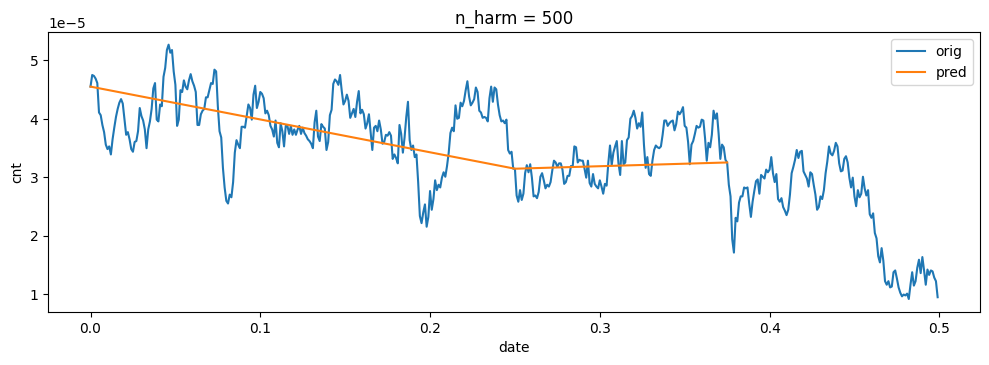

In [ ]:
# Визуализация результатов
plt.figure(figsize=(10, 20))

plt.subplot(6, 1, 5)
plt.plot(x, orig, label='orig')
# plt.plot([x[i] for i in range(0, len(x), 4)], val, label='val')
plt.plot([x[i] for i in range(0, len(x), 125)], pred_500, label='pred')
plt.title('n_harm = 500')
plt.xlabel('date')
plt.ylabel('cnt')
plt.legend()

# plt.subplot(6, 1, 6)
# plt.plot(data_test, label='test')
# plt.plot(pred_500[-100:], label='pred')
# plt.title('n_harm = 500')
# plt.xlabel('date')
# plt.ylabel('cnt')
# plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
len(pred_500)

125

In [ ]:
len(orig)

500

In [ ]:
len(val)

125

In [ ]:
# raw_data = data.get_data()
# info = data.info
# channels = data.ch_names

In [ ]:
channels = set()
n_chans = []
lowpass = []
highpass = []
for data_i in data:
    if len(channels) == 0:
        channels = set(data_i.info.ch_names)
    else:
        channels = channels.intersection(set(data_i.info.ch_names))
    n_chans.append(len(data_i.info.ch_names))
    lowpass.append(data_i.info['lowpass'])
    highpass.append(data_i.info['highpass'])

In [ ]:
# for data_i in data:
#     print(mne.events_from_annotations(data_i))

In [ ]:
len(channels)

24

In [ ]:
channels

{'BURSTS',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG CZ-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG FP1-REF',
 'EEG FP2-REF',
 'EEG FZ-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG PZ-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'IBI',
 'SUPPR'}

In [ ]:
max(n_chans)

36

In [ ]:
data[3]

<RawEDF | aaaaaacq_s008_t001.edf, 36 x 296000 (1184.0 s), ~39 KiB, data not loaded>

Using matplotlib as 2D backend.


C:\Users\kshch\AppData\Local\Temp\ipykernel_30740\1420139014.py:1: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  fig = data[0].plot(n_channels=30, theme='light')


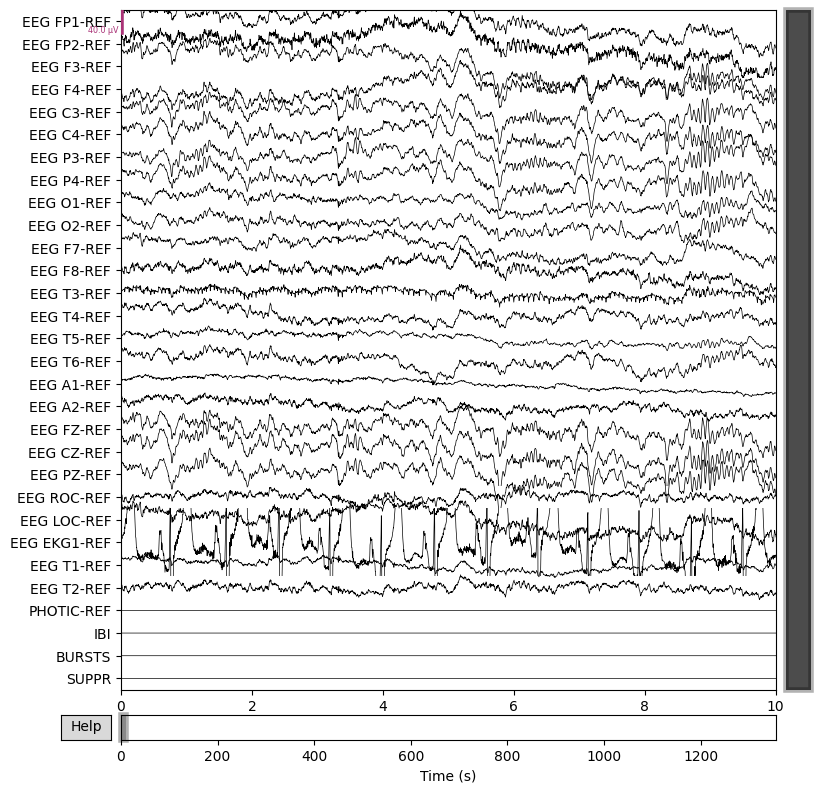

In [ ]:
fig = data[0].plot(n_channels=30, theme='light')
# data.plot?

Using matplotlib as 2D backend.


C:\Users\kshch\AppData\Local\Temp\ipykernel_30740\1420139014.py:1: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  fig = data[0].plot(n_channels=30, theme='light')


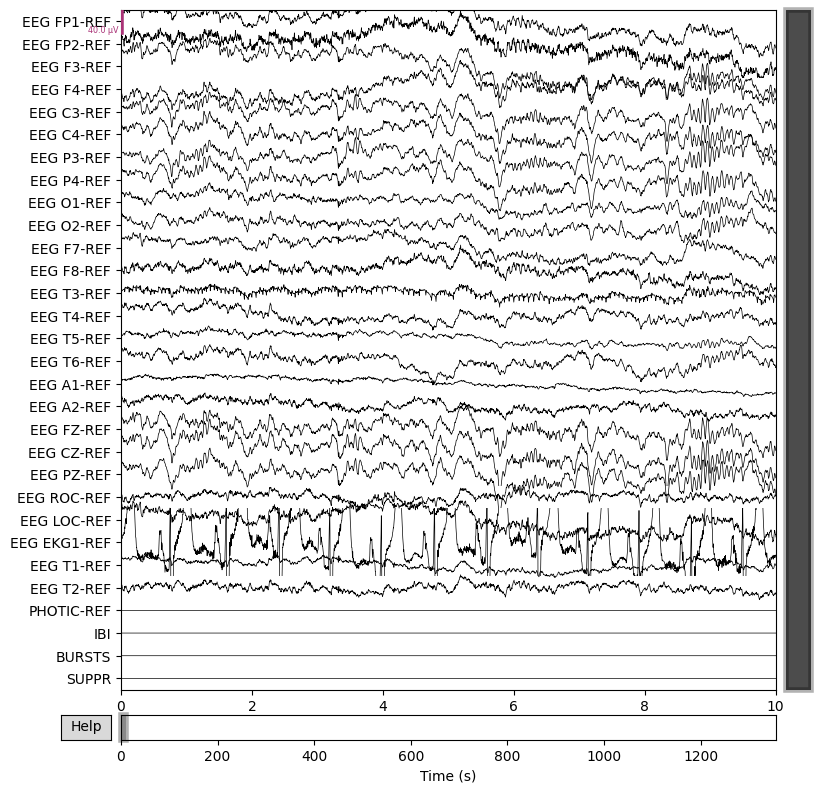

In [ ]:
fig = data[0].plot(n_channels=30, theme='light')
# data.plot?

## EEG-Based Visual Classification Dataset

In [1]:
# Define options
import argparse
parser = argparse.ArgumentParser(description="Template")
# Dataset options

#Data - Data needs to be pre-filtered and filtered data is available

### BLOCK DESIGN ###
#Data
#parser.add_argument('-ed', '--eeg-dataset', default=r"data\block\eeg_55_95_std.pth", help="EEG dataset path") #55-95Hz
parser.add_argument('-ed', '--eeg-dataset', default="../datasets/eeg_cvpr_2017/data/eeg_5_95_std.pth", help="EEG dataset path") #5-95Hz
#parser.add_argument('-ed', '--eeg-dataset', default=r"data\block\eeg_14_70_std.pth", help="EEG dataset path") #14-70Hz
#Splits
parser.add_argument('-sp', '--splits-path', default="../datasets/eeg_cvpr_2017/data/block_splits_by_image_all.pth", help="splits path") #All subjects
#parser.add_argument('-sp', '--splits-path', default=r"data\block\block_splits_by_image_single.pth", help="splits path") #Single subject
### BLOCK DESIGN ###

parser.add_argument('-sn', '--split-num', default=0, type=int, help="split number") #leave this always to zero.

#Subject selecting
parser.add_argument('-sub','--subject', default=0   , type=int, help="choose a subject from 1 to 6, default is 0 (all subjects)")

#Time options: select from 20 to 460 samples from EEG data
parser.add_argument('-tl', '--time_low', default=20, type=float, help="lowest time value")
parser.add_argument('-th', '--time_high', default=460,  type=float, help="highest time value")

# Model type/options
parser.add_argument('-mt','--model_type', default='lstm', help='specify which generator should be used: lstm|EEGChannelNet')
# It is possible to test out multiple deep classifiers:
# - lstm is the model described in the paper "Deep Learning Human Mind for Automated Visual Classification”, in CVPR 2017
# - model10 is the model described in the paper "Decoding brain representations by multimodal learning of neural activity and visual features", TPAMI 2020
parser.add_argument('-mp','--model_params', default='', nargs='*', help='list of key=value pairs of model options')
parser.add_argument('--pretrained_net', default='', help="path to pre-trained net (to continue training)")

# Training options
parser.add_argument("-b", "--batch_size", default=16, type=int, help="batch size")
parser.add_argument('-o', '--optim', default="Adam", help="optimizer")
parser.add_argument('-lr', '--learning-rate', default=0.001, type=float, help="learning rate")
parser.add_argument('-lrdb', '--learning-rate-decay-by', default=0.5, type=float, help="learning rate decay factor")
parser.add_argument('-lrde', '--learning-rate-decay-every', default=10, type=int, help="learning rate decay period")
parser.add_argument('-dw', '--data-workers', default=4, type=int, help="data loading workers")
parser.add_argument('-e', '--epochs', default=200, type=int, help="training epochs")

# Save options
parser.add_argument('-sc', '--saveCheck', default=100, type=int, help="learning rate")

# Backend options
parser.add_argument('--no-cuda', default=False, help="disable CUDA", action="store_true")

# Parse arguments
# opt = parser.parse_args()
opt, unknown = parser.parse_known_args()
print(opt)

Namespace(eeg_dataset='../datasets/eeg_cvpr_2017/data/eeg_5_95_std.pth', splits_path='../datasets/eeg_cvpr_2017/data/block_splits_by_image_all.pth', split_num=0, subject=0, time_low=20, time_high=460, model_type='lstm', model_params='', pretrained_net='', batch_size=16, optim='Adam', learning_rate=0.001, learning_rate_decay_by=0.5, learning_rate_decay_every=10, data_workers=4, epochs=200, saveCheck=100, no_cuda=False)


In [2]:
import torch

# Dataset class
class EEGDataset:
    
    # Constructor
    def __init__(self, eeg_signals_path):
        # Load EEG signals
        loaded = torch.load(eeg_signals_path)
        if opt.subject!=0:
            self.data = [loaded['dataset'][i] for i in range(len(loaded['dataset']) ) if loaded['dataset'][i]['subject']==opt.subject]
        else:
            self.data=loaded['dataset']        
        self.labels = loaded["labels"]
        self.images = loaded["images"]
        
        # Compute size
        self.size = len(self.data)

    # Get size
    def __len__(self):
        return self.size

    # Get item
    def __getitem__(self, i):
        # Process EEG
        eeg = self.data[i]["eeg"].float().t()
        eeg = eeg[opt.time_low:opt.time_high,:]

        if opt.model_type == "model10":
            eeg = eeg.t()
            eeg = eeg.view(1,128,opt.time_high-opt.time_low)
        # Get label
        label = self.data[i]["label"]
        # Return
        return eeg, label

In [5]:
loaded = torch.load(opt.eeg_dataset)

In [6]:
sample1 = loaded['dataset'][0]['eeg']

In [10]:
raw_i = np.array(sample1, dtype=np.floating)
raw_j = mne.filter.resample(raw_i, up=1, down=1000/500)
raw_k = mne.filter.resample(raw_i, up=1, down=1000/250)

C:\Users\kshch\AppData\Local\Temp\ipykernel_43032\2670463535.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  raw_i = np.array(sample1, dtype=np.floating)
C:\Users\kshch\AppData\Local\Temp\ipykernel_43032\2670463535.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  raw_i = np.array(sample1, dtype=np.floating)


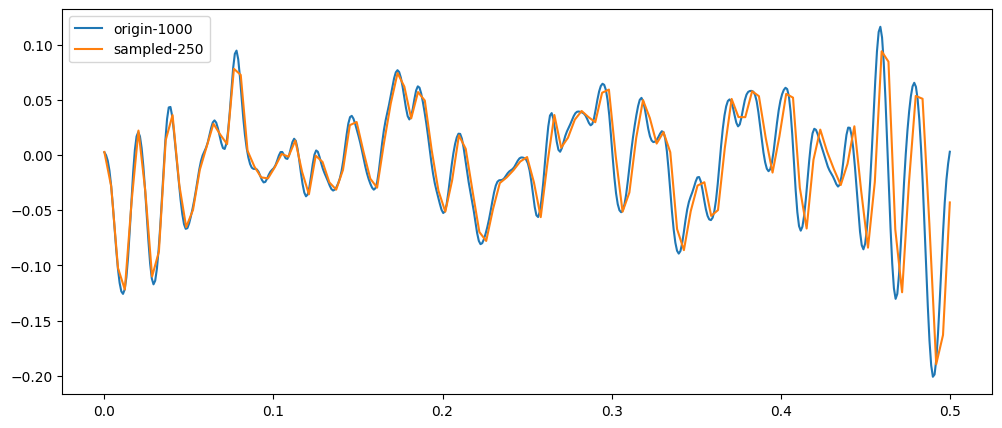

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# raw_i = np.array(sample1[1], dtype=np.floating)
# raw_j = mne.filter.resample(raw_i, up=1, down=1000/500)
# raw_k = mne.filter.resample(raw_i, up=1, down=1000/250)

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw_i.shape[1]), raw_i[10], label='origin-1000');
# plt.plot(np.linspace(0, 0.5, raw_j.shape[1]), raw_j[10], label='sampled-500');
plt.plot(np.linspace(0, 0.5, raw_k.shape[1]), raw_k[10], label='sampled-250');
plt.legend()

C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\1451740818.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  raw_i = np.array(sample1[2], dtype=np.floating)
C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\1451740818.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  raw_i = np.array(sample1[2], dtype=np.floating)


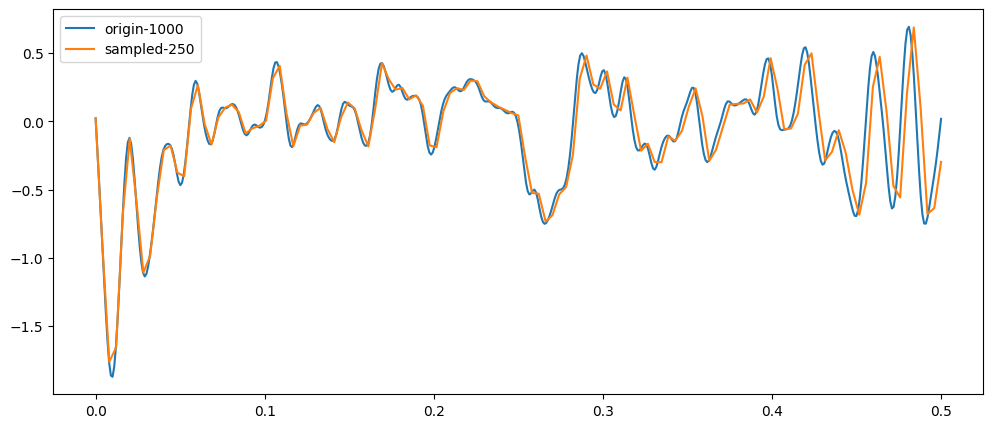

In [31]:
import matplotlib.pyplot as plt
import numpy as np

raw_i = np.array(sample1[2], dtype=np.floating)
raw_j = mne.filter.resample(raw_i, up=1, down=1000/500)
raw_k = mne.filter.resample(raw_i, up=1, down=1000/250)

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw_i.shape[0]), raw_i, label='origin-1000');
# plt.plot(np.linspace(0, 0.5, raw_j.shape[0]), raw_j, label='sampled-500');
plt.plot(np.linspace(0, 0.5, raw_k.shape[0]), raw_k, label='sampled-250');
plt.legend()

C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\4178353209.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  raw_i = np.array(sample1[3], dtype=np.floating)
C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\4178353209.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  raw_i = np.array(sample1[3], dtype=np.floating)


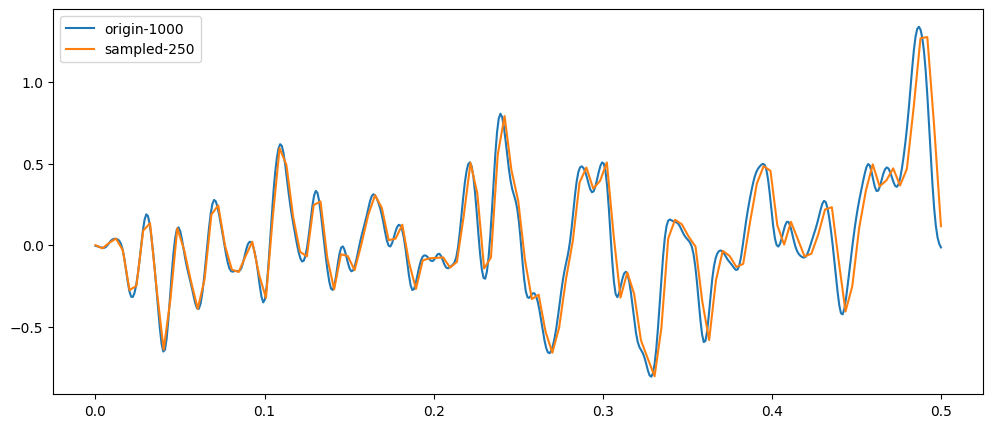

In [33]:
import matplotlib.pyplot as plt
import numpy as np

raw_i = np.array(sample1[3], dtype=np.floating)
raw_j = mne.filter.resample(raw_i, up=1, down=1000/500)
raw_k = mne.filter.resample(raw_i, up=1, down=1000/250)

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw_i.shape[0]), raw_i, label='origin-1000');
# plt.plot(np.linspace(0, 0.5, raw_j.shape[0]), raw_j, label='sampled-500');
plt.plot(np.linspace(0, 0.5, raw_k.shape[0]), raw_k, label='sampled-250');
plt.legend()

C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\3053066156.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  raw_i = np.array(sample1[4], dtype=np.floating)
C:\Users\kshch\AppData\Local\Temp\ipykernel_34380\3053066156.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  raw_i = np.array(sample1[4], dtype=np.floating)


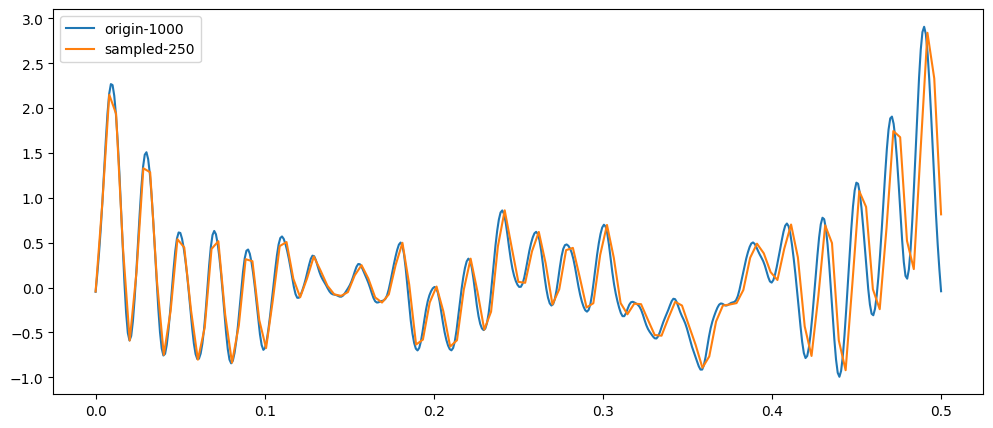

In [34]:
import matplotlib.pyplot as plt
import numpy as np

raw_i = np.array(sample1[4], dtype=np.floating)
raw_j = mne.filter.resample(raw_i, up=1, down=1000/500)
raw_k = mne.filter.resample(raw_i, up=1, down=1000/250)

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw_i.shape[0]), raw_i, label='origin-1000');
# plt.plot(np.linspace(0, 0.5, raw_j.shape[0]), raw_j, label='sampled-500');
plt.plot(np.linspace(0, 0.5, raw_k.shape[0]), raw_k, label='sampled-250');
plt.legend()